# Gradient Descent method

### Load libraries

In [503]:
# Base libraries
import numpy as np
import pandas as pd

# Plot libraries
import matplotlib.pyplot as plt

# Math libraries
import math

### Load dataset

In [504]:
# Load the dataset
dataset = pd.read_csv("Data/student_habits_performance_clean.csv", encoding='utf-8')
target_col = 'exam score [scale 1-10]'
print(dataset.columns.tolist())


['student_id', 'age [years]', 'gender', 'study hours per day', 'social media hours', 'Netflix hours', 'part_time_job', 'attendance percentage', 'sleep hours', 'diet_quality', 'exercise frequency [times/week]', 'parental_education_level', 'internet_quality', 'mental health rating [scale 1-10]', 'extracurricular_participation', 'exam score [scale 1-10]']


### Data Standardization and Design Matrix Construction for Regression

In [505]:
def standardize(x):
    """Standardize data to mean 0 and std dev 1."""
    return (x - np.mean(x)) / np.std(x)

def build_model_data(x, y):
    """Get regression data in matrix form."""
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]  # Add intercept column
    return A, b

# Select all numeric columns except 'student_id' and target
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numeric_cols:
    numeric_cols.remove('student_id')
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Extract features and target
features = dataset[numeric_cols].values
target = dataset['exam score [scale 1-10]'].values

# Standardize all numeric features
features_standardized = np.apply_along_axis(standardize, 0, features)
target_standardized = standardize(target)

# Build the model data matrix with intercept
A, b = build_model_data(features_standardized, target_standardized)


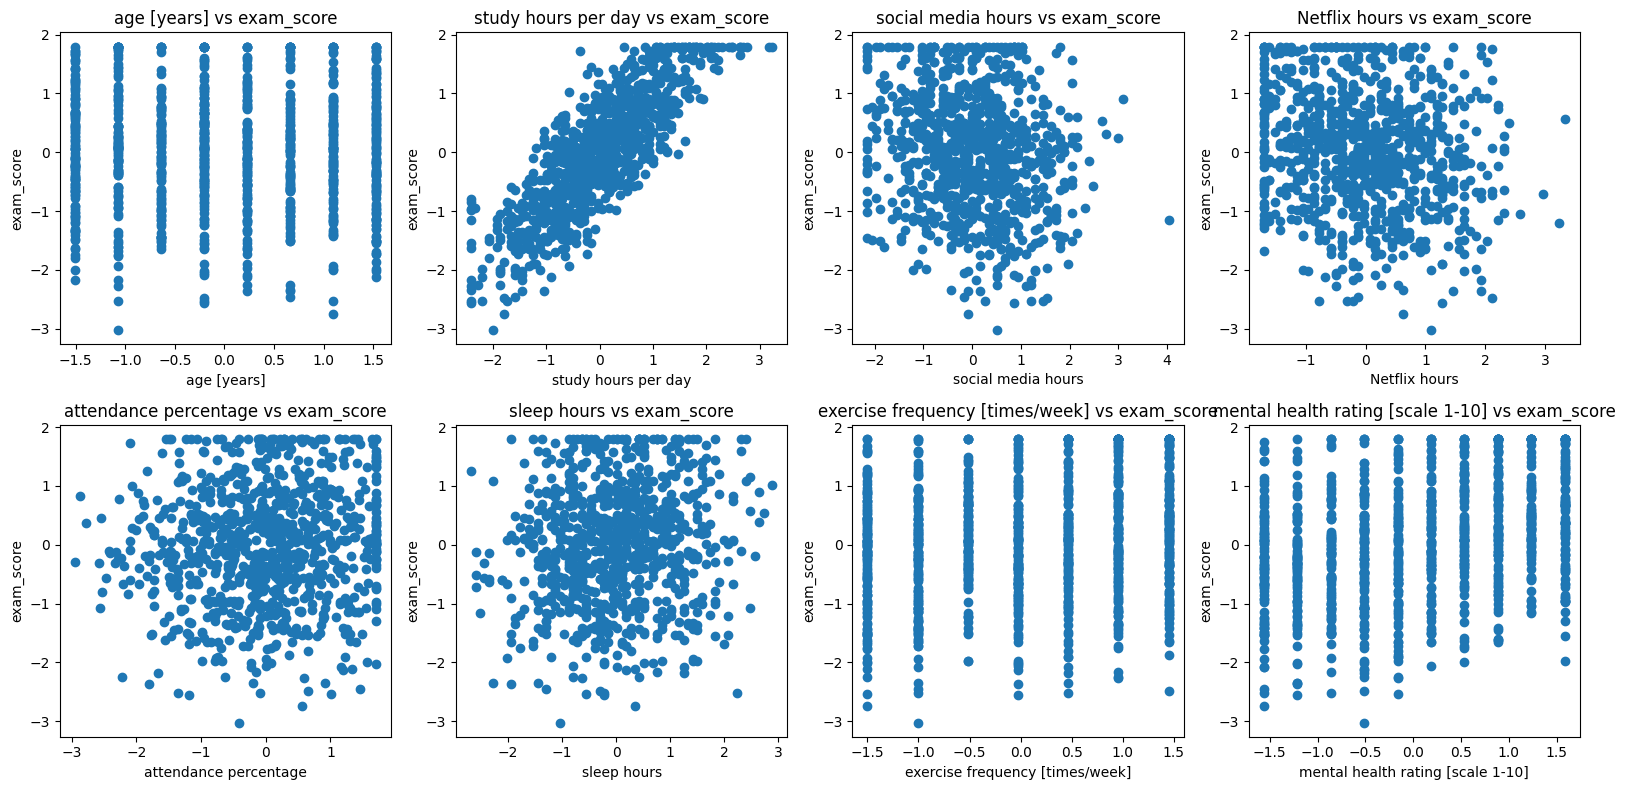

In [506]:
num_features = A.shape[1] - 1

num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    axes[i].scatter(A[:, i+1], b)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [507]:
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    Axmb = A.dot(x) - b
    grad = 2 * A.T.dot(Axmb)
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma, tol=1e-6):
    """Gradient descent algorithm with convergence check."""
    xs = [initial_x]
    objectives = []
    x = initial_x
    
    for n_iter in range(max_iters):
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)
        x = x - gamma * grad
        
        xs.append(x)
        objectives.append(obj)
        
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x=[{w0:.5f},{w1:.5f}]".format(
              bi=n_iter + 1, ti=max_iters, l=obj, w0=x[0], w1=x[1]))
        
        # Controlla convergenza
        if n_iter > 0:
            if abs(objectives[-1] - objectives[-2]) < tol:
                print()
                print(f"✅ Convergence reached after {n_iter} iterations.")
                break
    return objectives, xs

## Naive test


In [508]:
# Define the parameters of the algorithm.
max_iters = 400
gamma = 0.001  # gamma = 0.1 does not converge

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(1/400): objective=909.00000, x=[0.00000,-0.02333]
Gradient Descent(2/400): objective=605.89441, x=[-0.00000,0.01704]
Gradient Descent(3/400): objective=427.24779, x=[0.00000,-0.03881]
Gradient Descent(4/400): objective=319.26918, x=[-0.00000,0.03049]
Gradient Descent(5/400): objective=252.24183, x=[0.00000,-0.05016]
Gradient Descent(6/400): objective=209.47797, x=[-0.00000,0.03986]
Gradient Descent(7/400): objective=181.43316, x=[0.00000,-0.05776]
Gradient Descent(8/400): objective=162.53682, x=[-0.00000,0.04593]
Gradient Descent(9/400): objective=149.46577, x=[0.00000,-0.06253]
Gradient Descent(10/400): objective=140.19148, x=[-0.00000,0.04961]
Gradient Descent(11/400): objective=133.44646, x=[0.00000,-0.06529]
Gradient Descent(12/400): objective=128.42043, x=[-0.00000,0.05161]
Gradient Descent(13/400): objective=124.58410, x=[0.00000,-0.06666]
Gradient Descent(14/400): objective=121.58483, x=[-0.00000,0.05246]
Gradient Descent(15/400): objective=119.18352, x=[0.00000

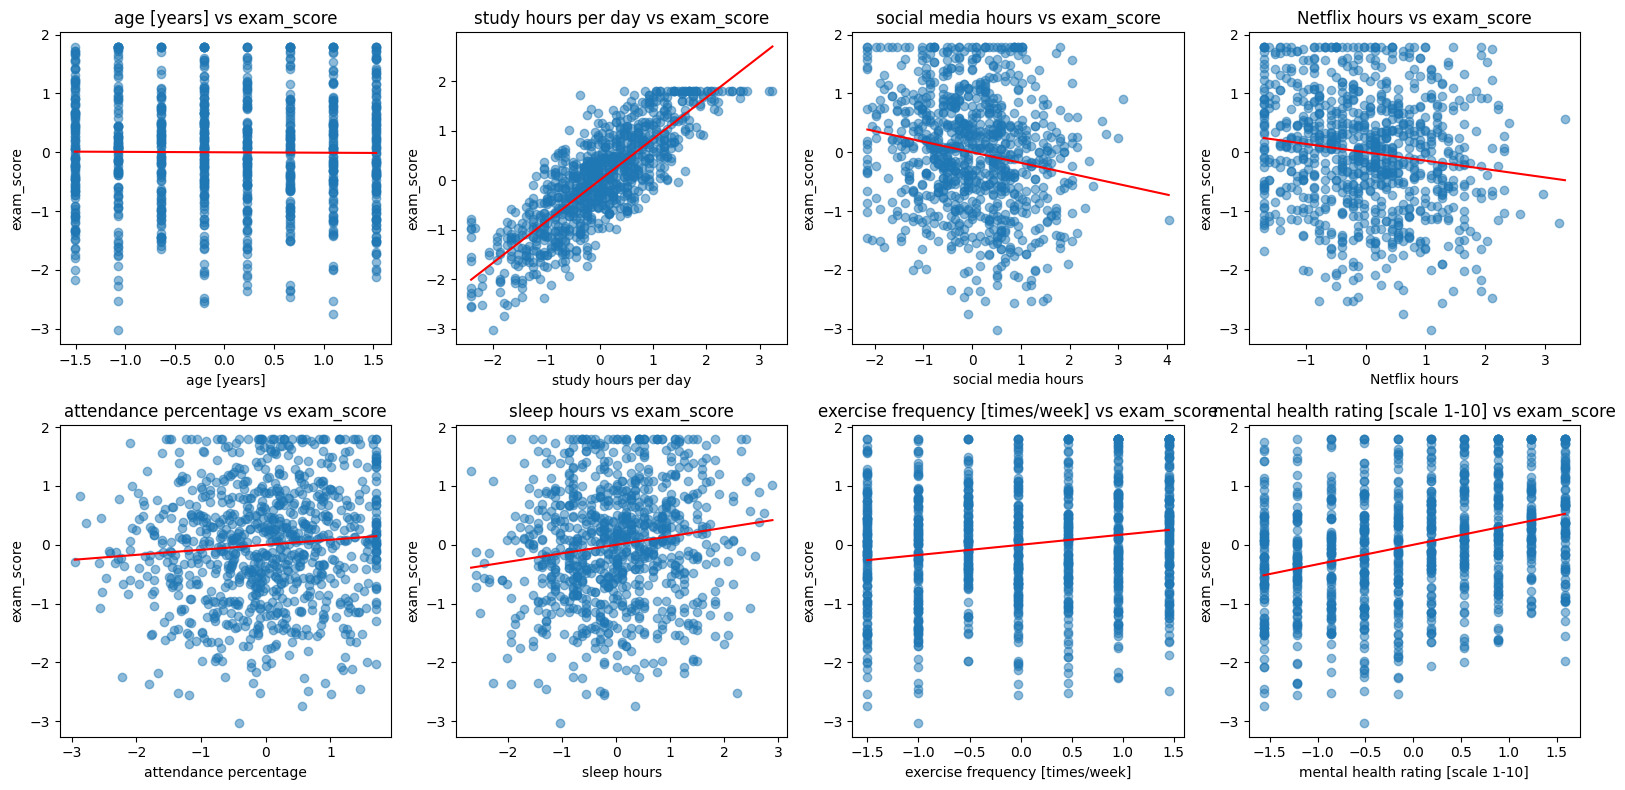

In [509]:
w_star = gradient_xs_naive[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Now try doing gradient descent with a better learning rate instead of a fixed $\gamma$.

# Gradient descent with smoothness constant $L$

In [510]:
def calculate_L(A, b):
    """Calculate the smoothness constant for f"""
    L = 2 * np.linalg.norm(A.T.dot(A), ord=2)
    return L

In [511]:
# Define the parameters of the algorithm.
max_iters = 10

L = calculate_L(A, b)
gamma_smooth = 1/calculate_L(A,b)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma_smooth)

Gradient Descent(1/10): objective=909.00000, x=[0.00000,-0.01178]
Gradient Descent(2/10): objective=99.76358, x=[-0.00000,-0.00732]
Gradient Descent(3/10): objective=91.14876, x=[-0.00000,-0.00720]
Gradient Descent(4/10): objective=91.02308, x=[-0.00000,-0.00724]
Gradient Descent(5/10): objective=91.02100, x=[-0.00000,-0.00725]
Gradient Descent(6/10): objective=91.02097, x=[-0.00000,-0.00725]
Gradient Descent(7/10): objective=91.02096, x=[-0.00000,-0.00725]

✅ Convergence reached after 6 iterations.


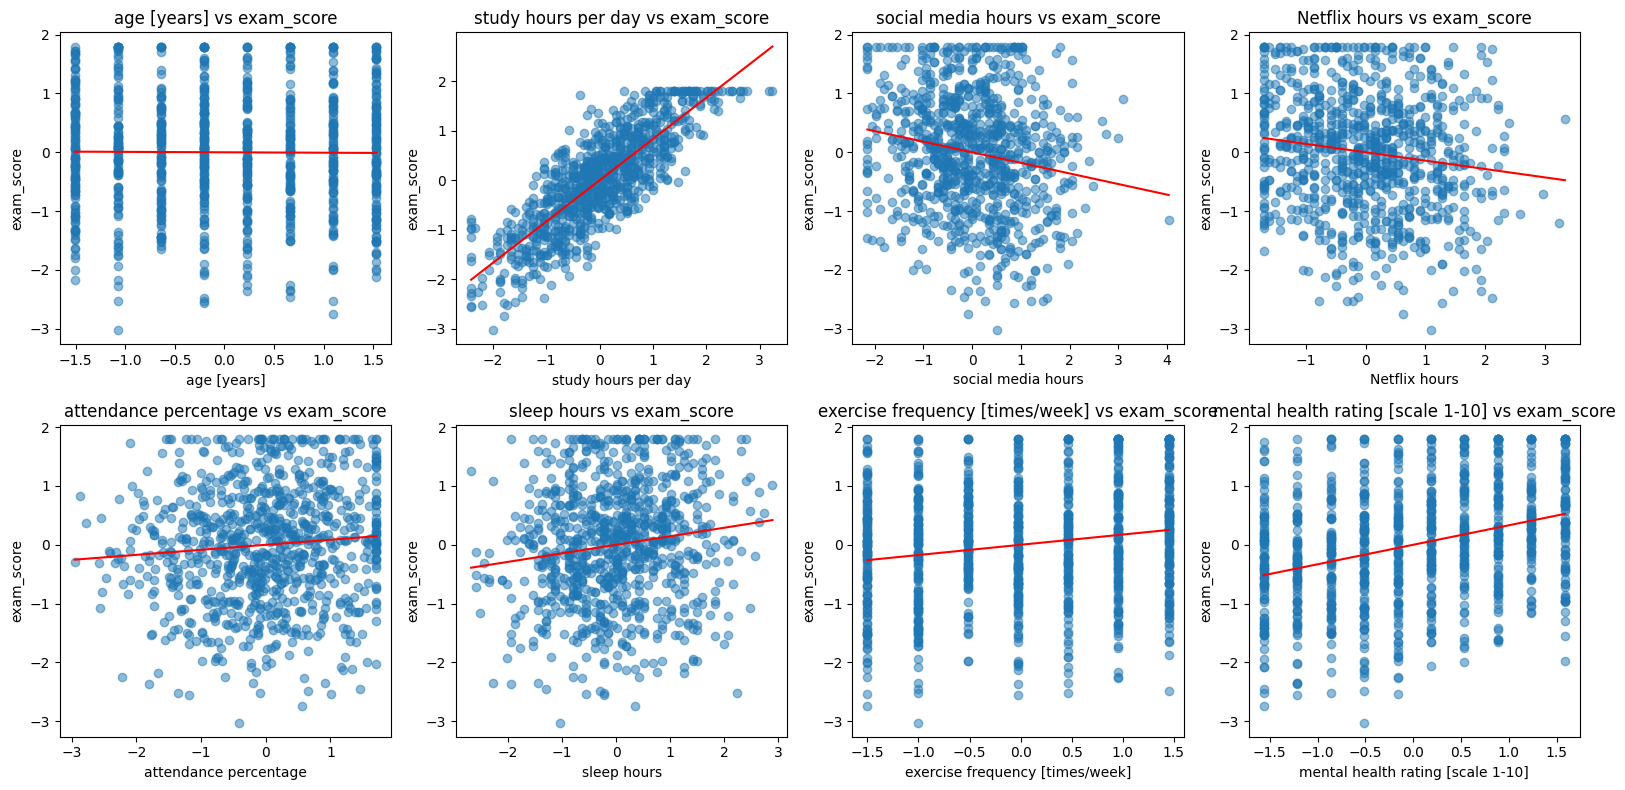

In [512]:
w_star = gradient_xs_smooth[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Assuming bounded gradients (Lipschitz function)

In [513]:
max_iters = 1000
R = 25

# Compute the bound B on the gradient norm
B = 2 * (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))

#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Gradient Descent(1/1000): objective=909.00000, x=[0.00000,-0.00013]
Gradient Descent(2/1000): objective=892.34559, x=[0.00000,-0.00026]
Gradient Descent(3/1000): objective=876.03086, x=[0.00000,-0.00039]
Gradient Descent(4/1000): objective=860.04886, x=[0.00000,-0.00052]
Gradient Descent(5/1000): objective=844.39280, x=[0.00000,-0.00065]
Gradient Descent(6/1000): objective=829.05601, x=[0.00000,-0.00077]
Gradient Descent(7/1000): objective=814.03198, x=[0.00000,-0.00089]
Gradient Descent(8/1000): objective=799.31431, x=[0.00000,-0.00101]
Gradient Descent(9/1000): objective=784.89675, x=[0.00000,-0.00113]
Gradient Descent(10/1000): objective=770.77316, x=[0.00000,-0.00124]
Gradient Descent(11/1000): objective=756.93755, x=[0.00000,-0.00136]
Gradient Descent(12/1000): objective=743.38402, x=[0.00000,-0.00147]
Gradient Descent(13/1000): objective=730.10683, x=[0.00000,-0.00158]
Gradient Descent(14/1000): objective=717.10032, x=[0.00000,-0.00169]
Gradient Descent(15/1000): objective=704.35

In [ ]:
w_star = gradient_xs_bounded[-1]  # final weight vector

num_features = A.shape[1] - 1
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    x_i = A[:, i+1]  # i-th standardized feature
    y = b             # standardized target
    
    axes[i].scatter(x_i, y, alpha=0.5)
    axes[i].set_xlabel(numeric_cols[i])
    axes[i].set_ylabel('exam_score')
    axes[i].set_title(f'{numeric_cols[i]} vs exam_score')
    
    # Calculate points for regression line:
    x_vals = np.array([x_i.min(), x_i.max()])
    y_vals = w_star[0] + w_star[i+1] * x_vals  # y = w0 + wi * x
    
    axes[i].plot(x_vals, y_vals, color='red')

# Remove unused axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


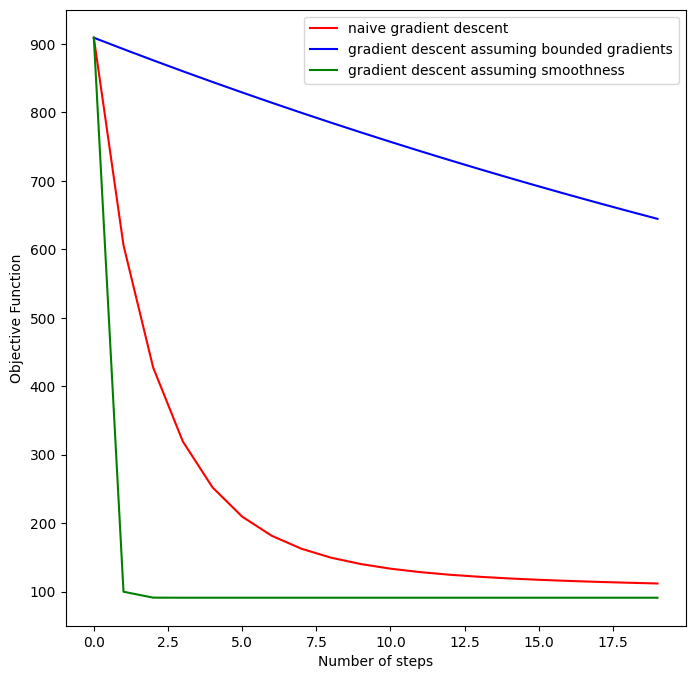

In [514]:
max_steps = 20

# Extend each list to 20 by repeating the last value if it's shorter
naive = gradient_objectives_naive + [gradient_objectives_naive[-1]] * (max_steps - len(gradient_objectives_naive)) if len(gradient_objectives_naive) < max_steps else gradient_objectives_naive[:max_steps]
bounded = gradient_objectives_bounded + [gradient_objectives_bounded[-1]] * (max_steps - len(gradient_objectives_bounded)) if len(gradient_objectives_bounded) < max_steps else gradient_objectives_bounded[:max_steps]
smooth = gradient_objectives_smooth + [gradient_objectives_smooth[-1]] * (max_steps - len(gradient_objectives_smooth)) if len(gradient_objectives_smooth) < max_steps else gradient_objectives_smooth[:max_steps]

plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(max_steps), naive, 'red', label='naive gradient descent')
plt.plot(range(max_steps), bounded, 'blue', label='gradient descent assuming bounded gradients')
plt.plot(range(max_steps), smooth, 'green', label='gradient descent assuming smoothness')

plt.legend(loc='upper right')
plt.show()

# Performance Comparison

We performed two tests to evaluate the execution time of the algorithm under different conditions:

- **Naive Test:** The algorithm took **26 ms** to complete.
- **Smooth Constant L Test:** By applying a smoothing constant \( L \), the algorithm's execution time improved, completing in **7 ms**.
- **bounded gradients (Lipschitz function):** By assuming bounded gradients (Lipschitz function) it complete in **59 ms**.

This shows that using the smooth constant \( L \) approach results in a faster convergence or more efficient computation compared to the naive implementation.